# 3. BPNN
## a. Inisialisasi dan Normalisasi Data

In [86]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

# load data
digits = load_digits()

# initialize x dan y
x = list()
y = list()

for input, output in zip(digits.images, digits.target):
    x.append(input.reshape((input.size)))
    y.append(output.reshape(output.size))

# normalisasi x dan y
xScaler = MinMaxScaler()
yScaler = OneHotEncoder(sparse = False)
x = xScaler.fit_transform(np.array(x))
y = yScaler.fit_transform(np.array(y))

x.shape, y.shape

((1797, 64), (1797, 10))

## b. Split Data Train (80%), Validation (20%)

In [87]:
from sklearn.model_selection import train_test_split

# train = 80%, validation = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

## c. Build BPNN Model with 3 layer (Input: 64 neuron - Hidden: 32 neuron - Output: 10 neuron)

In [88]:
import tensorflow as tf

# model layer shape (64 - 32 - 10)
input_neuron = x.shape[1]
output_neuron = y.shape[1]
hidden_neuron = 32

# build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(hidden_neuron, input_dim = input_neuron, activation = "relu"))
model.add(tf.keras.layers.Dense(output_neuron, activation = "softmax"))
model.compile(loss = "MSE", optimizer = "adam", metrics = ["accuracy"])

# train and validate model
history = model.fit(x_train, y_train, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
45/45 [==============================] - 1s 13ms/step - loss: 0.0904 - accuracy: 0.1618 - val_loss: 0.0821 - val_accuracy: 0.3972
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.4176 - val_loss: 0.0678 - val_accuracy: 0.4944
Epoch 3/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.5519 - val_loss: 0.0510 - val_accuracy: 0.7417
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.7477 - val_loss: 0.0391 - val_accuracy: 0.8083
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.8142 - val_loss: 0.0312 - val_accuracy: 0.8583
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.8705 - val_loss: 0.0247 - val_accuracy: 0.9083
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.9221 - val_loss: 0.0209 - val_accuracy: 0.9167
Epoch 8/20
45/45 [=

## d. Model Accuracy

In [89]:
_, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy*100}%")

12/12 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9528
Accuracy: 95.27778029441833%


## A. Training accuracy and validation accuracy curves

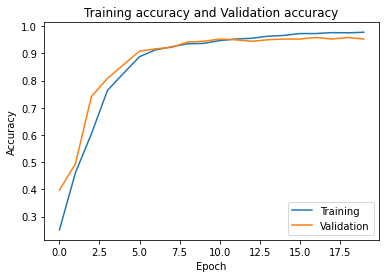

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

## B. Performance analysis of the model based on the associated confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(x_test)
confusion_matrix(yScaler.inverse_transform(y_test), y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  3,  0,  0,  1,  1,  0,  1, 27,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 30]], dtype=int64)